In [1]:
import numpy as np 
import pandas as pd
from scipy import ndimage 
from scipy.cluster import hierarchy 
from scipy.spatial import distance_matrix 
from matplotlib import pyplot as plt 
from sklearn import manifold, datasets 
from sklearn.cluster import AgglomerativeClustering 
from sklearn.datasets.samples_generator import make_blobs 
%matplotlib inline

In [2]:
X1, y1 = make_blobs(n_samples=50, centers=[[4,4], [-2, -1], [1, 1], [10,4]], cluster_std=0.9)

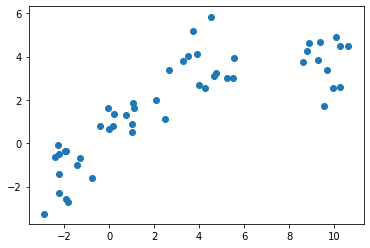

In [3]:
plt.scatter(X1[:, 0], X1[:, 1], marker='o') 

In [6]:
# Agglomerative clustering

agglom = AgglomerativeClustering(n_clusters = 4, linkage = 'average')
agglom.fit(X1,y1)

AgglomerativeClustering(affinity='euclidean', compute_full_tree='auto',
                        connectivity=None, distance_threshold=None,
                        linkage='average', memory=None, n_clusters=4,
                        pooling_func='deprecated')

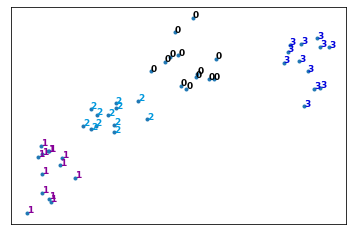

In [7]:
# Create a figure of size 6 inches by 4 inches.
plt.figure(figsize=(6,4))

# These two lines of code are used to scale the data points down,
# Or else the data points will be scattered very far apart.

# Create a minimum and maximum range of X1.
x_min, x_max = np.min(X1, axis=0), np.max(X1, axis=0)

# Get the average distance for X1.
X1 = (X1 - x_min) / (x_max - x_min)

# This loop displays all of the datapoints.
for i in range(X1.shape[0]):
    # Replace the data points with their respective cluster value 
    # (ex. 0) and is color coded with a colormap (plt.cm.spectral)
    plt.text(X1[i, 0], X1[i, 1], str(y1[i]),
             color=plt.cm.nipy_spectral(agglom.labels_[i] / 10.),
             fontdict={'weight': 'bold', 'size': 9})
    
# Remove the x ticks, y ticks, x and y axis
plt.xticks([])
plt.yticks([])
#plt.axis('off')



# Display the plot of the original data before clustering
plt.scatter(X1[:, 0], X1[:, 1], marker='.')
# Display the plot
plt.show()


In [8]:
# Dendrogram associated with agglomerative clustering

dist_matrix = distance_matrix(X1,X1) 
print(dist_matrix)

[[0.         0.18120954 0.82393575 ... 0.11525996 0.73016854 0.09907904]
 [0.18120954 0.         0.643398   ... 0.06743797 0.55234719 0.08234441]
 [0.82393575 0.643398   0.         ... 0.7106877  0.11783558 0.72567103]
 ...
 [0.11525996 0.06743797 0.7106877  ... 0.         0.61969145 0.01715261]
 [0.73016854 0.55234719 0.11783558 ... 0.61969145 0.         0.6336604 ]
 [0.09907904 0.08234441 0.72567103 ... 0.01715261 0.6336604  0.        ]]


In [9]:
Z = hierarchy.linkage(dist_matrix, 'complete')

C:\Users\VenkyTheGreat\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: ClusterWarning: scipy.cluster: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix
  """Entry point for launching an IPython kernel.


C:\Users\VenkyTheGreat\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: ClusterWarning: scipy.cluster: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix
  This is separate from the ipykernel package so we can avoid doing imports until


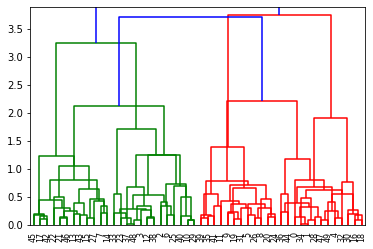

In [10]:
dendro = hierarchy.dendrogram(Z)

Z = hierarchy.linkage(dist_matrix, 'average')
dendro = hierarchy.dendrogram(Z)
